In [1]:
from dynamics import make_dynamic_curve
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")

In [2]:
from coinbase_api import CoinbaseAPI

# make it as params of the script:
pair = 'XTZ-USD'
freq = 'H'

api = CoinbaseAPI()

dfs = {
    'H': api.get_history_prices(pair=pair, granularity=3600),
    '6H': api.get_history_prices(pair=pair, granularity=21600),
    'D': api.get_history_prices(pair=pair, granularity=86400),
}

In [3]:
curves = pd.DataFrame({
    freq: make_dynamic_curve(df, pair, freq, 0.1, num=21)
    for freq, df in dfs.items()
})

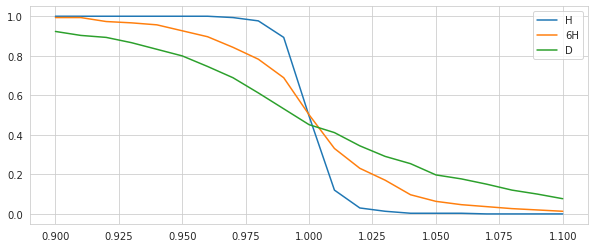

In [4]:
ax = curves.plot(figsize=(10, 4))
plt.savefig('dynamic_curve.png')

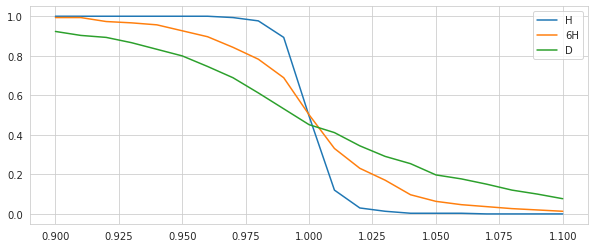

In [5]:
ax = curves.plot(figsize=(10, 4))
plt.savefig('dynamic_curve.png')

In [6]:
data = api.get_history_prices(pair=pair, granularity=60)

In [7]:
# row = data[ data.time == pd.to_datetime(1626094500, unit='s') ].iloc[0]
# (row.open + row.close)/2

In [8]:
# (row.open + row.close)/2

### Provide Liquidity pool sizes for Juster Maker:

In [9]:
from importlib import reload
import event_lines
reload(event_lines)

from event_lines import EventLines

In [10]:
lines = EventLines(api)

In [11]:
len(lines.generate_new())

9

In [12]:
lines.save('event_lines.json')

In [13]:
!cp event_lines.json ../../../juster-maker/event_lines.json

In [14]:
from dynamics import calc_rate_by_freq_and_target
calc_rate_by_freq_and_target(dfs['H'], freq='3600S', target_dynamics=1)

0.49498327759197325